In [173]:
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [223]:
sns.set(
        font_scale = 2,
        style      = 'whitegrid',
        rc         = {'figure.figsize' :(25, 12)})


In [207]:
df = pd.read_csv('B:\Karpov Courses\Stat\games.csv')

In [176]:
df = df.dropna()

In [177]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [179]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

C:\Users\Shaetan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


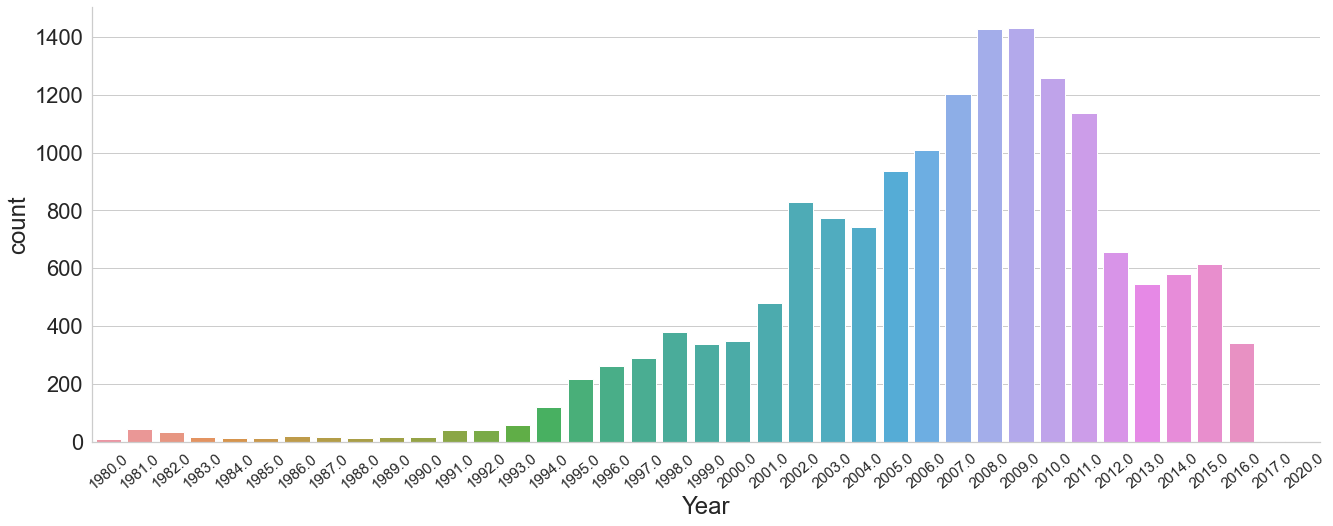

In [181]:
ax = sns.countplot(df.Year)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, size = 15)
sns.despine()

In [182]:
df1 = df.groupby('Platform', as_index = False)\
                .agg({'Rank' : 'count'})\
                .rename(columns={'Rank' : 'Counts'})\
                .sort_values('Counts', ascending = False)
                

In [183]:
df1.head(10)

,Platform,Counts
4,DS,2131
16,PS2,2127
17,PS3,1304
26,Wii,1290
28,X360,1234
19,PSP,1197
15,PS,1189
13,PC,938
29,XB,803
6,GBA,786


In [184]:
df1['Rate'] = df1.Counts/df.count()[0]

In [185]:
plat = df1.query('Rate >= 0.07').Platform

In [186]:
lst = []
for i in plat:
    lst.append(i)
print(lst)

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']


In [187]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [188]:
nintendo = df.query('Publisher == "Nintendo"')

In [189]:
nintendo.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [230]:
def metrics(column):
    NA_Sales_mean = column.mean()
    print(f'{column.name} Mean = {NA_Sales_mean}')
    NA_Sales_median = column.median()
    print(f'{column.name} Median = {NA_Sales_median}')
    NA_Sales_std = column.std()
    print(f'{column.name} Standart Deviation = {NA_Sales_std}')

In [231]:
metrics(nintendo.JP_Sales)

JP_Sales Mean = 0.6537212643678161
JP_Sales Median = 0.28
JP_Sales Standart Deviation = 1.063110044538652


In [232]:
metrics(nintendo.NA_Sales)

NA_Sales Mean = 1.1720545977011492
NA_Sales Median = 0.375
NA_Sales Standart Deviation = 2.9899128164968642


In [233]:
metrics(nintendo.Other_Sales)

Other_Sales Mean = 0.13676724137931034
Other_Sales Median = 0.03
Other_Sales Standart Deviation = 0.4641703766411941


In [234]:
metrics(nintendo.EU_Sales)

EU_Sales Mean = 0.6010057471264366
EU_Sales Median = 0.12
EU_Sales Standart Deviation = 1.743953375382063


<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

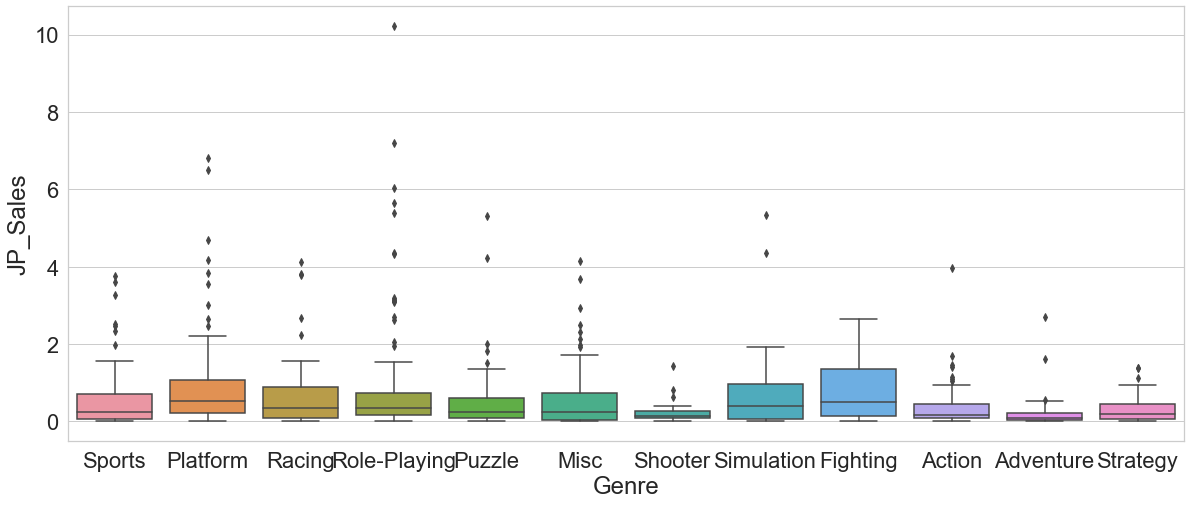

In [208]:
sns.boxplot(x = nintendo.Genre, y = nintendo.JP_Sales, data=nintendo)

In [220]:
years = nintendo.query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')")\
        .groupby(['Year','Genre'], as_index=False)\
        .agg({'Global_Sales':'sum'})

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

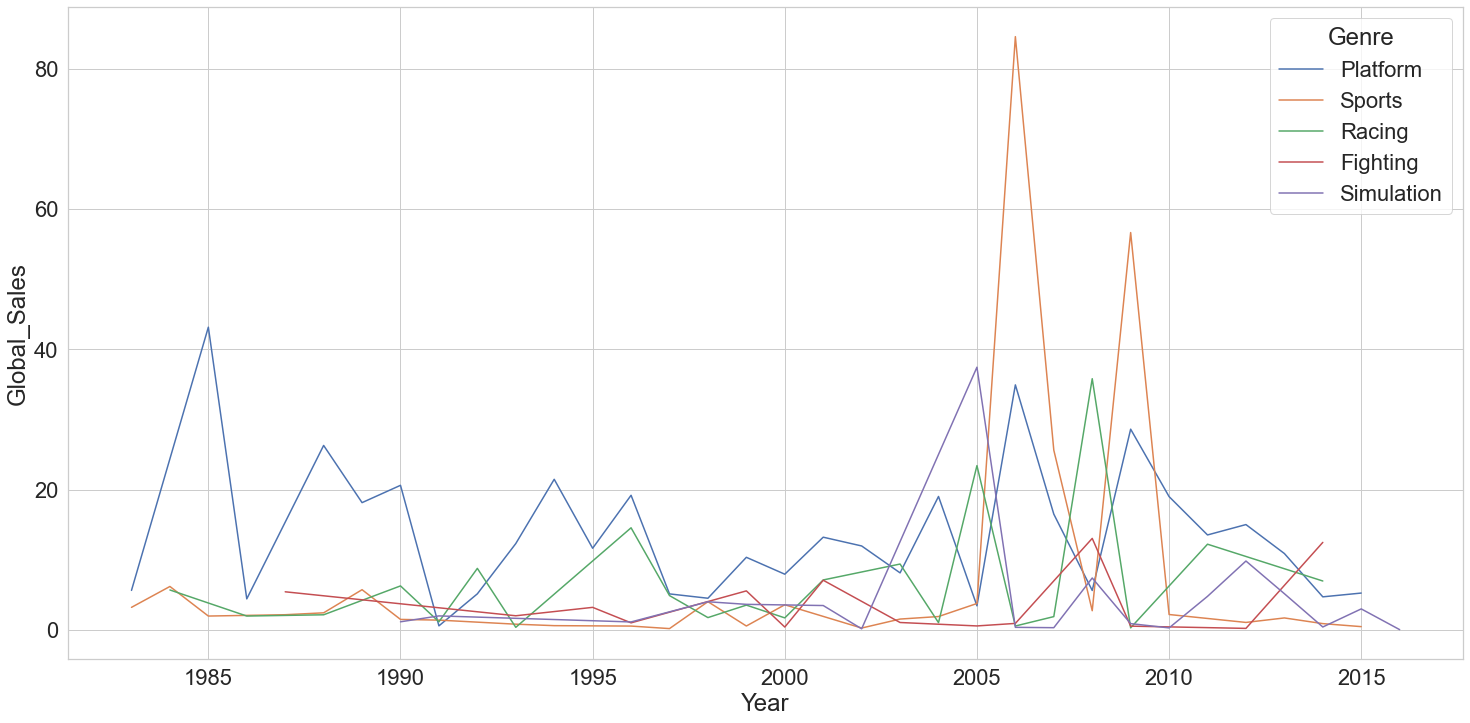

In [224]:
sns.lineplot(x = years.Year , y = years.Global_Sales, hue = years.Genre , data=years)


In [221]:
years

,Year,Genre,Global_Sales
0,1983.0,Platform,5.62
1,1983.0,Sports,3.20
2,1984.0,Racing,5.68
3,1984.0,Sports,6.18
4,1985.0,Platform,43.17
...,...,...,...
109,2014.0,Sports,0.88
110,2015.0,Platform,5.24
111,2015.0,Simulation,2.98
112,2015.0,Sports,0.45
